In [2]:
import os
import pandas as pd
from typing import Optional, Sequence, Union

pd.set_option('display.max_columns', None)

from core import * 

In [3]:
WINE_DF.head(3)

,country,province,points,price,variety
0,US,California,96,235.0,Cabernet Sauvignon
1,Spain,Northern Spain,96,110.0,Tinta de Toro
2,US,California,96,90.0,Sauvignon Blanc


In [5]:
profile( WINE_DF )

ROW TOTAL = 1,752 COLUMNS = 5


,Variable Name,Variable Type,Missing Count,% Blank,Unique Values,Most Frequent Value,Mean,Standard Deviation,Min,25%,Median,75%,Max
0,country,object,0,0,24,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,province,object,0,0,120,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,points,int64,0,0,13,90,89.55,2.32,84.0,88.0,90.0,91.0,96.0
3,price,float64,88,5,110,20.0,38.71,29.39,7.0,20.0,30.0,48.0,500.0
4,variety,object,0,0,161,Pinot Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN


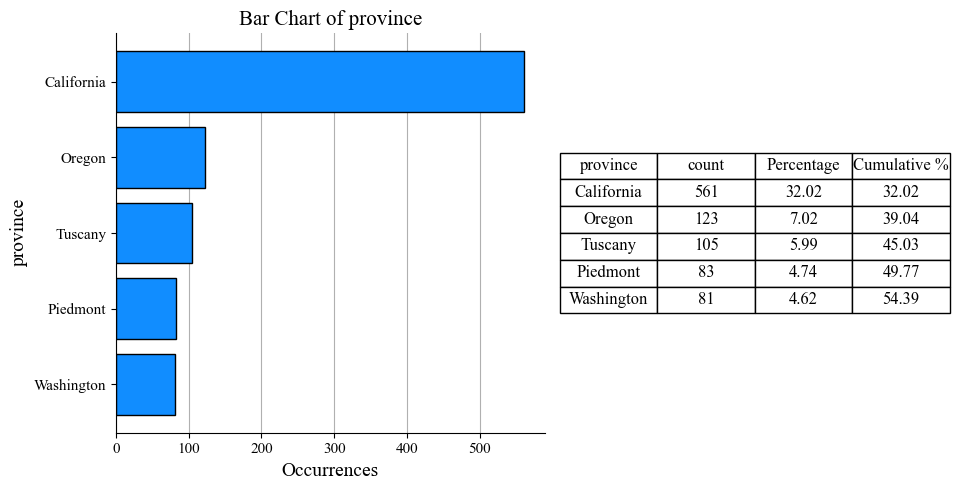

In [38]:
fig = bar(WINE_DF, 'province', width = 9.7, height = 5, bar_color='#118dff') 
fig.savefig('D:/Documents/Python/DataNova/imges/BAR_GRAPH_v3.png', dpi = 550)
display(fig) 

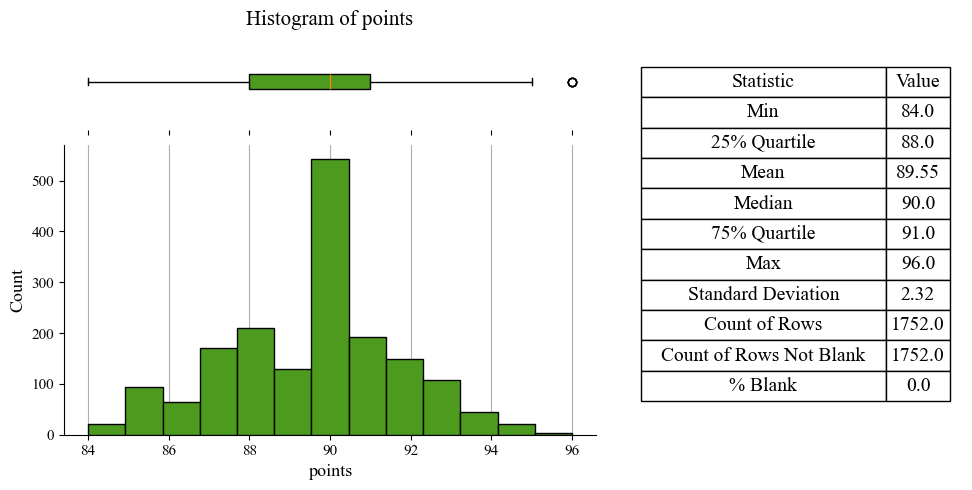

In [ ]:
fig = hist(WINE_DF, 'points', width = 10, height = 5, n_bins=13) 
fig.savefig('D:/Documents/Python/DataNova/imges/HIST.png', dpi = 550)
display(fig)  

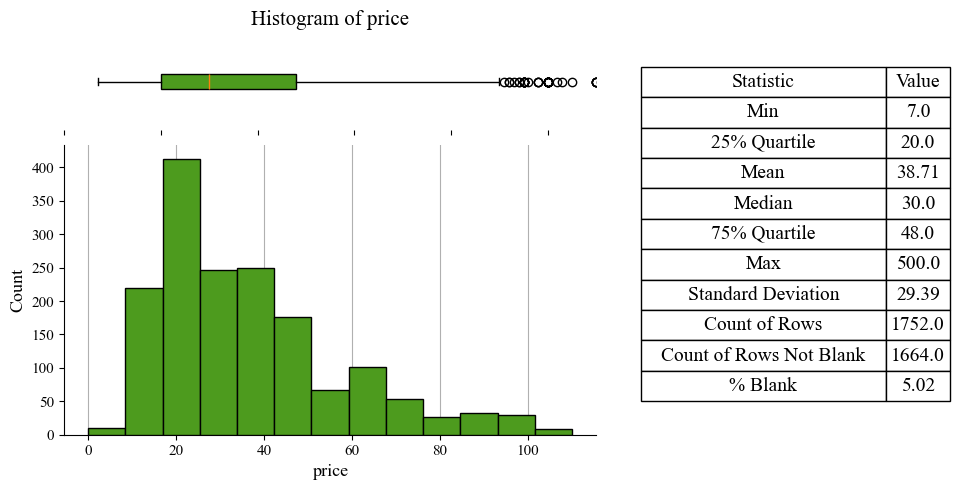

In [ ]:
fig = hist(WINE_DF, 'price', width = 10, height = 5, n_bins=13, xlim=[0,110]) 
fig.savefig('D:/Documents/Python/DataNova/imges/HIST.png', dpi = 550)
display(fig)  

In [ ]:
fig = EDA(df) 

---

### EDA

In [ ]:
bar()

---
Profile testing above. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from typing import Optional

def linreg_plot(
    df, 
    xvar: str, 
    yvar: str,
    xtitle:  Optional[str]   = None, 
    ytitle:  Optional[str]   = None,
    alpha:   Optional[float] = 0.8 , 
    show_r2: Optional[bool]  = True ):
    """
    Quick linear regression plot for exploratory analysis.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    xvar, yvar : str
        Column names for X and Y.
    xtitle, ytitle : str, optional
        Axis titles (defaults to column names).
    alpha : float, optional
        Scatter transparency (default = 0.8).
    show_r2 : bool, optional
        Whether to print R² score in console.

    Returns
    -------
    model : sklearn.linear_model.LinearRegression
        Fitted model (for further use if needed).
    """

    # Drop rows with missing data
    data = df[[xvar, yvar]].dropna()

    x = data[[xvar]].values
    y = data[yvar].values

    model = LinearRegression().fit(x, y)
    r2 = model.score(x, y)
    m, b = model.coef_[0], model.intercept_

    if show_r2:
        print(f"R² = {r2:.3f}")

    # Predicted values
    y_pred = model.predict(x)

    # Label for regression line
    label = f"Y = {m:.3f}·X + {b:.2f} (R²={r2:.2f})"

    # Plot
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(5.2, 4.8))
        plt.scatter(x, y, alpha=alpha, label="Data")
        plt.plot(x, y_pred, color="red", linewidth=2, label=label)
        plt.xlabel(xtitle or xvar, fontsize=13)
        plt.ylabel(ytitle or yvar, fontsize=13)
        plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=11, frameon=True)
        plt.tight_layout()
        plt.show()

    return model


In [ ]:
m = linreg_plot( df3 , "A", "B")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def lm_stats_plot(
    df: pd.DataFrame,
    xvar: str,
    yvar: str,
    xtitle: str = None,
    ytitle: str = None,
    alpha: float = 0.8,
    show_summary: bool = True
):
    """
    PURPOSE
    -------
    Fit a simple linear regression model using statsmodels and visualize the results.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    xvar : str
        Independent variable (X).
    yvar : str
        Dependent variable (Y).
    xtitle, ytitle : str, optional
        Axis labels. Defaults to column names.
    alpha : float, optional
        Scatter transparency (default = 0.8).
    show_summary : bool, optional
        Whether to print the regression summary table (default = True).

    Returns
    -------
    model : statsmodels.regression.linear_model.RegressionResultsWrapper
        The fitted statsmodels OLS regression model.
    """

    # Drop missing values for the chosen variables
    data = df[[xvar, yvar]].dropna()

    # Independent variable (add constant for intercept)
    X = sm.add_constant(data[xvar])
    y = data[yvar]

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Optionally print full regression summary
    if show_summary:
        print(model.summary())

    # Extract regression line
    x_vals = np.linspace(data[xvar].min(), data[xvar].max(), 100)
    X_pred = sm.add_constant(x_vals)
    y_pred = model.predict(X_pred)

    # Plot
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(5.5, 4.8))
        plt.scatter(data[xvar], data[yvar], alpha=alpha, label="Observed")
        plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Fitted line")

        # Labels
        plt.xlabel(xtitle or xvar, fontsize=13)
        plt.ylabel(ytitle or yvar, fontsize=13)

        # Equation annotation
        slope = model.params[xvar]
        intercept = model.params["const"]
        r2 = model.rsquared
        eqn = f"Y = {slope:.3f}·X + {intercept:.2f} (R²={r2:.2f})"
        plt.legend([eqn], loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=11)

        plt.tight_layout()
        plt.show()

    return model


In [ ]:
model = lm_stats_plot(df3, "A", "B")  